## MNIST MLP-vel

In [1]:
%matplotlib inline
%config IPCompleter.greedy=True

In [2]:
from multilayer_nn import mlp, activations, losses, regularizers, initializers, optimizers
from pckutils import mnist, utils
import numpy as np
from matplotlib import pyplot as plt
import os

### MNIST adatok betöltése

In [3]:
data = mnist.load_mnist('data')

2051 60000 28 28
Reading images: [100%]
2049 60000
Reading labels: [100%]
2051 10000 28 28
Reading images: [100%]
2049 10000
Reading labels: [100%]


In [4]:
# x-et kiegészítjük egy bias-val, ami 1, illetve 1-hot-encode-oljuk
X = utils.add_bias_to_vectors(utils.scale(data.X_train, 1/255.0))
Y = utils.one_hot_encode(data.Y_train, 10)

### Felépítjük a neurális hálót

In [5]:
loss = losses.CrossEntropy()
initializer = initializers.Xavier()
regularizer = regularizers.ZeroRegularizer()
optimizer = optimizers.SGD(0.1)

In [6]:
nn = mlp.Mlp(optimizer, loss, initializer, regularizer)

In [7]:
nn.add_layer(30, input_length=28*28+1, activation=activations.Relu())
nn.add_layer(20, activation=activations.Tanh())
nn.add_layer(10, activation=activations.Softmax())

In [8]:
# callback for gathering the error rates during training
history = {'errors': [], 'losses': []}
def performance_monitor(batch_y_p, batch_y, loss, ep, itr):
    if itr % 2 == 0:
        history['losses'].append(loss)
        err = utils.error_rate(batch_y_p, batch_y)
        history['errors'].append(err)

In [ ]:
nn.fit(X, Y, 20, 6000, verbose=True, callback=performance_monitor)

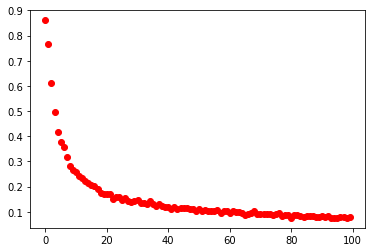

In [11]:
iterations = [i for i in range(len(history['errors']))]
plt.plot(iterations, history['errors'], 'ro')
plt.show()

In [13]:
# hiba arány a teszt adathalmazon
X_test = utils.add_bias_to_vectors(utils.scale(data.X_test, 1/255.0))
Y_test = utils.one_hot_encode(data.Y_test, 10)
y_p = nn.predict_batch(X_test, 'onehot')

error_rate = utils.error_rate(y_p, Y_test) * 100

print('The error rate: %.2f%%' %error_rate)

The error rate: 7.75%


In [14]:
utils.save_parameters(nn.theta, "weights/MultiLayerNN.json")